# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Your code here
data=pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 3/Week 8/Day 37/boston_data.csv')
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [5]:
# Looking for missing data
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<AxesSubplot:>

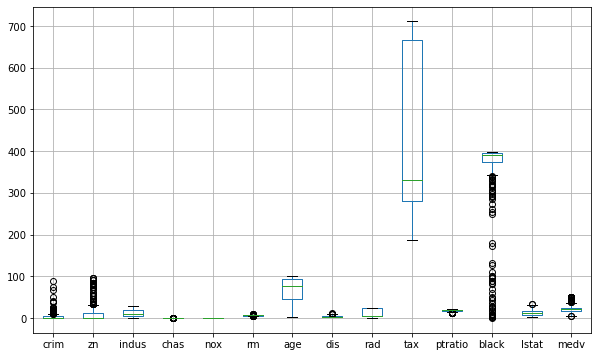

In [6]:
# looking for outliers (Descriptive stats)

plt.figure(figsize=(10, 6))
data.boxplot()

# No missing values/outliers

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


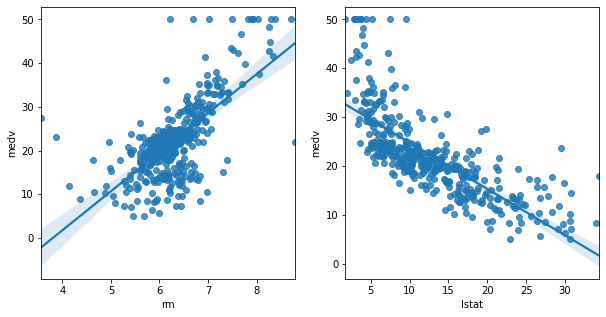

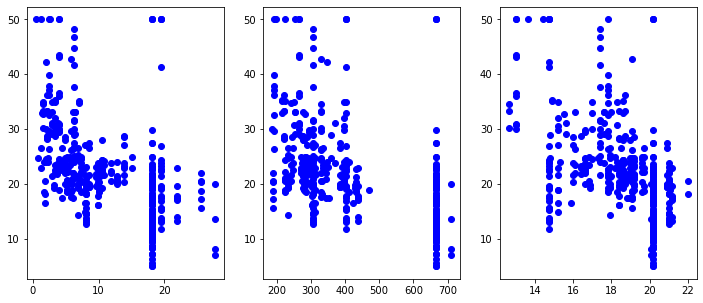

In [11]:
# Your plots here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(data.rm, data.medv, ax=ax1)
sns.regplot(data.lstat, data.medv, ax=ax2)

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.scatter(data.indus, data.medv, c='b')

ax2.scatter(data.tax, data.medv, c='b')
ax3.scatter(data.ptratio, data.medv, c='b')

plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
rm is correlated to the price whereas lstat is negatively correlated to the price
I imagined a better correlation between age and the price (considering that it the real life elder people buy)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

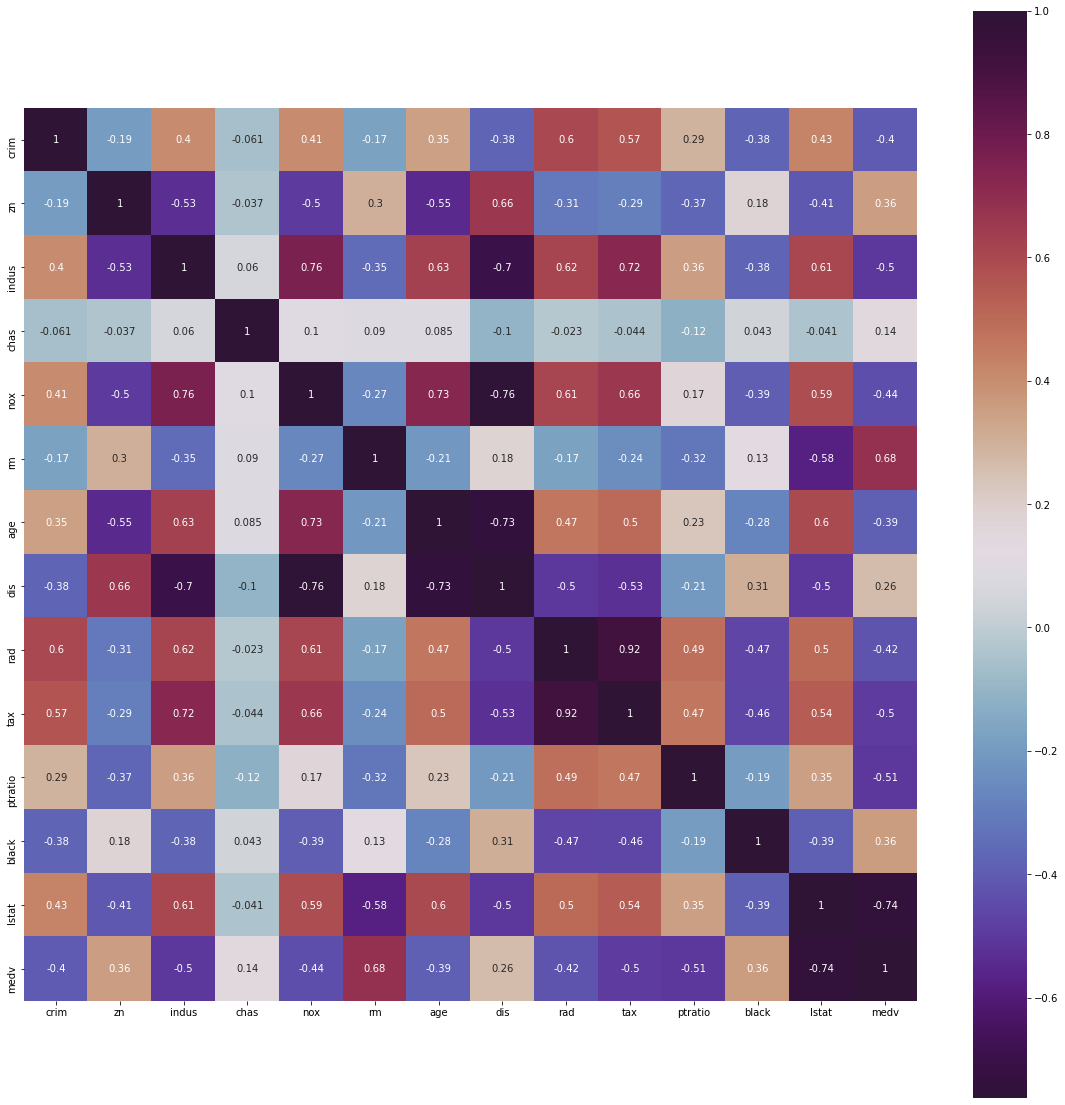

In [12]:
# Your response here

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),square=True,annot=True,cmap='twilight_shifted')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
# Your code here
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    
    score = r2_score(y_true, y_predict)
    
    print('Score: %.2f' % score)


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [16]:
# Your code here

# test-train split 
from sklearn.model_selection import train_test_split

X = data.drop('medv', axis=1)
y = data.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print(X.shape, y.shape)


(404, 13) (404,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [17]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

Max_depth = [2, 4, 6, 8, 10]

for i in Max_depth:
    RFR = RandomForestRegressor(max_depth=i, random_state=0)
    RFR.fit(X_train, y_train)
    print(RFR)


RandomForestRegressor(max_depth=2, random_state=0)
RandomForestRegressor(max_depth=4, random_state=0)
RandomForestRegressor(max_depth=6, random_state=0)
RandomForestRegressor(max_depth=8, random_state=0)
RandomForestRegressor(max_depth=10, random_state=0)


Now, plot the score for each tree on the training set and on the testing set.

In [21]:
# Produce a plot with the score for the testing and training for the different max depths

for i in Max_depth:
    RFR = RandomForestRegressor(max_depth=i, random_state=0)
    RFR.fit(X_train, y_train)
    y_pred = RFR.predict(X_test)
    print(performance_metric(y_test, y_pred))


Score: 0.80
None
Score: 0.87
None
Score: 0.90
None
Score: 0.91
None
Score: 0.91
None


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
For this model, the deeper the forest, the better the score

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [22]:
# Your response here
for i in [1, 11]:
    RFR = RandomForestRegressor(max_depth=i, random_state=0)
    RFR.fit(X_train, y_train)
    
    y_pred = RFR.predict(X_test)
    
    print(performance_metric(y_test, y_pred))
    

Score: 0.61
None
Score: 0.91
None


In [ ]:
A depth 1: score is 61% thus the model suffers from a high bias and a low variance
At depth 10: score is 91% with a low bias and a high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [24]:
# Your response here

for i in range(1, 30, 3):
    RFR = RandomForestRegressor(max_depth=i, random_state=0)
    RFR.fit(X_train, y_train)
    
    y_pred = RFR.predict(X_test)
    
    print(performance_metric(y_test, y_pred))


Score: 0.61
None
Score: 0.87
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None
Score: 0.91
None


In [ ]:
Starting a point the score doesn't evolve better (91%)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
How relevant today is data that was collected from 1978?
Data is too old somehow unapplicable with today's selection criteria

Are the features present in the data sufficient to describe a home?
Basically, the more we add features, the better we can understand the needs

Is the model robust enough to make consistent predictions?
The RFR model is robust enough since it reaches a score of 91%. Nevertheless, this model becomes 
less efficiant with a larger set of features and with a larger database

Would data collected in an urban city like Boston be applicable in a rural city?
I believe not